# Scraping Salary Data From ESPN 

In [75]:
# Importing packages
from bs4 import BeautifulSoup
import requests

In [76]:
# Getting HTML content
page = requests.get("http://www.espn.com/nba/salaries/_/year/2018/page/1/seasontype/3")
page

<Response [200]>

In [77]:
# creating a instance of beautifulsoup class to parse the document
soup = BeautifulSoup(page.content, 'html.parser') 
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [78]:
# Finding data in HTML
data = soup.find_all('div', class_ ="mod-content")
player_data = data[1].find_all('tr')

## Extracting information

In [79]:
# Name of the player
player_data[1].a.text

'Stephen Curry'

In [80]:
# Position of the player
player_data[1].find_all('td')[1].text[-2:]

'PG'

In [81]:
# Team of the player
player_data[1].find_all('td')[2].text

'Golden State Warriors'

In [82]:
# Salary of the player
value = int(player_data[1].find_all('td')[3].text.lstrip('$').replace(",",""))
print(value)

37457154


# Building the final scraper

## Importing reqired packges

In [83]:
from bs4 import BeautifulSoup
from requests import get
import requests
from time import sleep, time
from random import randint
from IPython.display import clear_output
import pandas as pd
import warnings

## Building the scraper

In [84]:
# Creating list to store data
Names = []
Posi = []
Teams = []
Salaries = []

# Preparing the monitoring of loop
start_time = time()
requests = 0

# Itraring through different years to scrape data 
years = ['2019','2020','2021']
for y in years:
    site = get('http://www.espn.com/nba/salaries/_/year/'+ y +'/page/1/seasontype/3')
    page_html = BeautifulSoup(site.content, 'html.parser')
    
    # Find last page of table for each year
    last = page_html.find('div', class_ = 'page-numbers')
    last = int(last.text[-2:])

    # Iterating through pages
    pages = [str(i) for i in range(1,last+1)] 
    for page in pages:
        response = get('http://www.espn.com/nba/salaries/_/year/' + y + '/page/' + page + '/seasontype/3')
        print('http://www.espn.com/nba/salaries/_/year/2018/page/' + page + '/seasontype/3')

        # Pause the loop
        sleep(randint(5,9))

        # Monitot the request
        requests += 1
        elapsed_time = time() - start_time
        clear_output(wait = True)
        print('Request: {}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))

        # Throw a warning for non-200 status codes
        if response.status_code != 200:
            warn('Request: {}; Status code: {}'.format(requests, response.status_code))
        

        # Parse the content of the request with BeautifulSoup
        page_html = BeautifulSoup(response.content, 'html.parser')

        # Select the table of salary data
        data = page_html.find_all('div', class_ ="mod-content")
        player_data1 = data[1].find_all('tr', class_ = 'evenrow')
        player_data2 = data[1].find_all('tr', class_ = 'oddrow')

        # Extract data from each evenrow
        for info in player_data1:

            if info.a is None:
                pass
            else:

                # Name of player
                na = info.a.text
                Names.append(na)

                # Position of player
                po = info.find_all('td')[1].text[-2:]
                Posi.append(po)

                # Team of player
                te = info.find_all('td')[2].text
                Teams.append(te)

                # Salary of player
                sa =  int(info.find_all('td')[3].text.lstrip('$').replace(",",""))
                Salaries.append(sa)

        # Extract data from each oddrow
        for info in player_data2:

            if info.a is None:
                pass
            else:

                # Name of player
                na = info.a.text
                Names.append(na)

                # Position of player
                po = info.find_all('td')[1].text[-2:]
                Posi.append(po)

                # Team of player
                te = info.find_all('td')[2].text
                Teams.append(te)

                # Salary of player
                sa =  int(info.find_all('td')[3].text.lstrip('$').replace(",",""))
                Salaries.append(sa)
end_t = time()
total_time = end_t - start_time
print('Total Time Required: {}'.format(total_time))

Request: 41; Frequency: 0.11449270793585756 requests/s
Total Time Required: 358.16741251945496


## Converting information of DataFrame

In [85]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
Basedf = pd.DataFrame({
'Name':Names,
'Position':Posi,
'Team':Teams,
'Salary':Salaries})        

print(Basedf.info())
Basedf

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1580 entries, 0 to 1579
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      1580 non-null   object
 1   Position  1580 non-null   object
 2   Team      1580 non-null   object
 3   Salary    1580 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 30.9+ KB
None


,Name,Position,Team,Salary
0,Russell Westbrook,PG,Oklahoma City Thunder,35654150
1,LeBron James,SF,Los Angeles Lakers,35654150
2,Gordon Hayward,SF,Boston Celtics,31214295
3,Paul George,SG,Oklahoma City Thunder,30560700
4,James Harden,SG,Houston Rockets,30421854
...,...,...,...,...
1575,Nemanja Bjelica,F,Miami Heat,432890
1576,Alize Johnson,PF,Brooklyn Nets,399591
1577,Dion Waiters,G,Los Angeles Lakers,375385
1578,Devonte' Graham,PG,Charlotte Hornets,163861


In [86]:
# Saving data to avoid rescaping of data
Basedf.to_csv('Salary.csv')

## Slicing DataFrame as per years


In [87]:
# 2019
df2019 = Basedf.iloc[0:503,:]
# 2020
df2020 = Basedf.iloc[503:1031,:]
#2021
df2021 = Basedf.iloc[1031:,:]

# Scraping Player Statics

In [88]:
# Getting HTML Content
from requests import get
page = get("https://www.basketball-reference.com/leagues/NBA_2019_totals.html")
page

<Response [200]>

In [89]:
# creating a instance of beautifulsoup class to parse the document
soup = BeautifulSoup(page.content, 'html.parser') 
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [90]:
# Locating Stat 
data = soup.find_all('div', id="div_totals_stats")
st = data[0].find_all('tr')

## Extracting Player Statistics

Extractiog names will be useful during associating stats with salaries extracted earlier

In [91]:
# Extracing name
st[1].find('td', class_ = 'left').a.text

'Álex Abrines'

Exracting Numerical Data

In [92]:
# Games Played
Games = int(st[1].find_all('td')[4].text)
Games

31

In [93]:
# Minutes Played
MP = int(st[1].find_all('td')[6].text)
MP

588

In [94]:
# Field Goal Percentage
FGp = float(st[1].find_all('td')[9].text)
FGp

0.357

In [95]:
# Three Point Percentage
THp = float(st[1].find_all('td')[12].text)
THp

0.323

In [96]:
# Two Point Precentages
TOp = float(st[1].find_all('td')[15].text)
TOp

0.5

In [97]:
# Free Throw Percentages
FTp = float(st[1].find_all('td')[19].text)
FTp

0.923

In [98]:
# Total Rebound
TR = float(st[1].find_all('td')[22].text)
TR

48.0

In [99]:
# Assists
AS = float(st[1].find_all('td')[23].text)
AS

20.0

In [100]:
# Steals
ST = float(st[1].find_all('td')[24].text)
ST

17.0

In [101]:
#Blocks
BL = float(st[1].find_all('td')[25].text)
BL

6.0

In [102]:
# Turovers
TO = float(st[1].find_all('td')[26].text)
TO

14.0

In [103]:
# Points
PO = float(st[1].find_all('td')[28].text)
PO

165.0

## Building Stats Scraper

In [104]:
# Creating list to store data
Names = []
Games = []
MinPly = []
FGper = []
THper = []
TWper = []
FThrow = []
TRebound = []
Assist = []
Steal = []
Block = []
TOver = []
Points = []

# Preparing the monitoring of loop
start_time = time()
requests = 0

# Itraring through different years to scrape data 
years = ['2019','2020','2021']
for y in years:
    response = get('https://www.basketball-reference.com/leagues/NBA_' + y +'_totals.html')
    page_html = BeautifulSoup(response.content, 'html.parser')

    # Pause the loop
    sleep(randint(5,9))

    # Monitot the request
    requests += 1
    elapsed_time = time() - start_time
    clear_output(wait = True)
    print('Request: {}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))

    # Throw a warning for non-200 status codes
    if response.status_code != 200:
        warn('Request: {}; Status code: {}'.format(requests, response.status_code))


    # Parse the content of the request with BeautifulSoup
    page_html = BeautifulSoup(response.content, 'html.parser')

    # Select the table of stats
    data = page_html.find_all('div', id="div_totals_stats")
    st = data[0].find_all('tr', class_ = 'full_table')
    
    # Extract stats of each player
    for info in st:
        
        # Name of player
        na = info.find('td', class_ = 'left').a.text
        Names.append(na)

        # Games Played
        G = int(info.find_all('td')[4].text)
        Games.append(G)

        # Minutes Played
        M = int(info.find_all('td')[6].text)
        MinPly.append(M)
        
        # Field Goal Percentage
        if info.find_all('td')[9].text != '':     
            F = float(info.find_all('td')[9].text)
            FGper.append(F)
        else:
            FGper.append(0)

            
        # Three Point Percentage
        if info.find_all('td')[12].text != '':
            T = float(info.find_all('td')[12].text)
            THper.append(T)
        else:
            THper.append(0)
        
        # Two Point Percentage
        if info.find_all('td')[15].text != '':
            TW = float(info.find_all('td')[15].text)
            TWper.append(TW)
        else:
            TWper.append(0)

            
        #Free Throw Percentage
        if info.find_all('td')[19].text != '':
            FT = float(info.find_all('td')[19].text)
            FThrow.append(FT)
        else:
            FThrow.append(0)
                               
        # Total Rebound
        TR = float(info.find_all('td')[22].text)
        TRebound.append(TR)
        
        # Assist
        A = float(info.find_all('td')[23].text)
        Assist.append(A)
        
        # Steals
        S = float(info.find_all('td')[24].text)
        Steal.append(S)
        
        # Block
        B = float(info.find_all('td')[25].text)
        Block.append(B)
        
        #Turn Over
        TO = float(info.find_all('td')[26].text)
        TOver.append(TO)
        
        # Points
        P = float(st[1].find_all('td')[28].text)
        Points.append(P)

end_time = time()
total_time = end_time - start_time
print('Total Time Required: {}'.format(total_time))

Request: 3; Frequency: 0.05990790448597411 requests/s
Total Time Required: 53.7416296005249


## Converting to DataFrame

In [105]:
import pandas as pd
Basedf2 = pd.DataFrame({
    'Name' : Names,
    'Games_Played':Games,
    'Minutes_Playes':MinPly,
    'Field_Goal_%':FGper,
    'Three_Point_%':THper,
    'Two_Point_%': TWper,
    'Free_Throw_%':FThrow,
    'Total_Rebound':TRebound,
    'Assist':Assist,
    'Steal':Steal,
    'Block':Block,
    'Turn_Over':TOver,
    'Points':Points
})
print(Basedf.info())
Basedf2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1580 entries, 0 to 1579
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      1580 non-null   object
 1   Position  1580 non-null   object
 2   Team      1580 non-null   object
 3   Salary    1580 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 30.9+ KB
None


,Name,Games_Played,Minutes_Playes,Field_Goal_%,Three_Point_%,Two_Point_%,Free_Throw_%,Total_Rebound,Assist,Steal,Block,Turn_Over,Points
0,Álex Abrines,31,588,0.357,0.323,0.500,0.923,48.0,20.0,17.0,6.0,14.0,17.0
1,Quincy Acy,10,123,0.222,0.133,0.667,0.700,25.0,8.0,1.0,4.0,4.0,17.0
2,Jaylen Adams,34,428,0.345,0.338,0.361,0.778,60.0,65.0,14.0,5.0,28.0,17.0
3,Steven Adams,80,2669,0.595,0.000,0.596,0.500,760.0,124.0,117.0,76.0,135.0,17.0
4,Bam Adebayo,82,1913,0.576,0.200,0.588,0.735,597.0,184.0,71.0,65.0,121.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,Delon Wright,63,1748,0.463,0.372,0.509,0.802,269.0,278.0,101.0,30.0,83.0,2.0
1595,Thaddeus Young,68,1652,0.559,0.267,0.580,0.628,423.0,291.0,74.0,40.0,137.0,2.0
1596,Trae Young,63,2125,0.438,0.343,0.491,0.886,245.0,594.0,53.0,12.0,261.0,2.0
1597,Cody Zeller,48,1005,0.559,0.143,0.598,0.714,328.0,86.0,27.0,17.0,51.0,2.0


In [106]:
# Saving data to avoid rescaping of data
Basedf2.to_csv('Stats.csv')

## Slicing the data as per year

In [107]:
# 2019
df2_2019 = Basedf2.iloc[0:530,:]
# 2020
df2_2020 = Basedf2.iloc[530:1059,:]
#2021
df2_2021 = Basedf2.iloc[1059:,:]

## Merger Salary and Stats Data

In [108]:
Final19 = pd.merge(df2_2019,df2019, on="Name")
Final20 = pd.merge(df2_2020,df2020, on="Name")
Final21 = pd.merge(df2_2021,df2021, on="Name")

## Merging All Data

In [127]:
frames = [Final19, Final20, Final21]
FinalData = pd.concat(frames)
FinalData.head(3)

,Name,Games_Played,Minutes_Playes,Field_Goal_%,Three_Point_%,Two_Point_%,Free_Throw_%,Total_Rebound,Assist,Steal,Block,Turn_Over,Points,Position,Team,Salary
0,Jaylen Adams,34,428,0.345,0.338,0.361,0.778,60.0,65.0,14.0,5.0,28.0,17.0,G,Atlanta Hawks,270014
1,Steven Adams,80,2669,0.595,0.000,0.596,0.500,760.0,124.0,117.0,76.0,135.0,17.0,C,Oklahoma City Thunder,24157303
2,Bam Adebayo,82,1913,0.576,0.200,0.588,0.735,597.0,184.0,71.0,65.0,121.0,17.0,C,Miami Heat,2955840


# Correlation Plot

<AxesSubplot:>

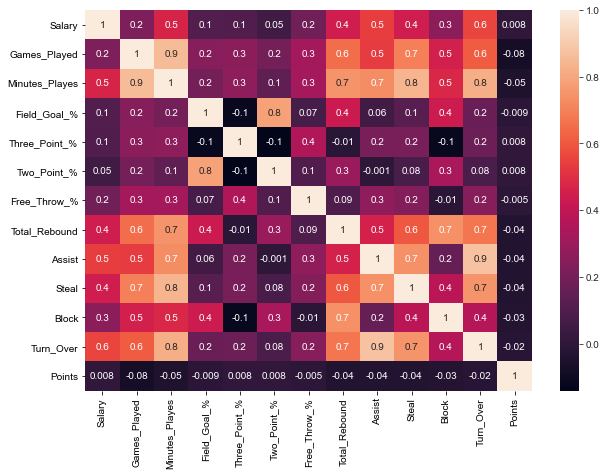

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,7))
sns.set_style("white")
pltData = FinalData[[ 'Salary','Position', 'Games_Played','Minutes_Playes', 'Field_Goal_%', 'Three_Point_%', 'Two_Point_%' , 'Free_Throw_%', 'Total_Rebound', 'Assist', 'Steal', 'Block', 'Turn_Over','Points'  ]]
dfData = pltData.corr() 
sns.heatmap((dfData),annot = True,fmt='.1g')

## Visualizing change in Salary wrt Parameter for each position

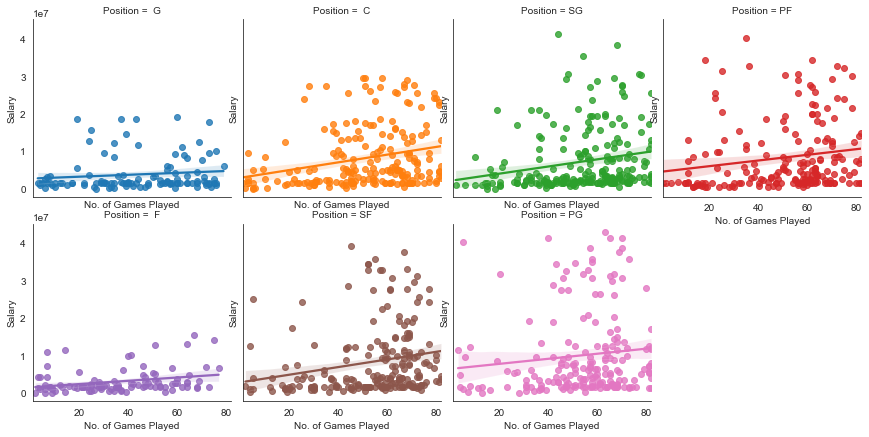

In [111]:
sns.lmplot(x="Games_Played", y="Salary",hue="Position",col="Position",
           data=FinalData,height=3, aspect=1,col_wrap=4).set(xlabel='No. of Games Played', ylabel='Salary')

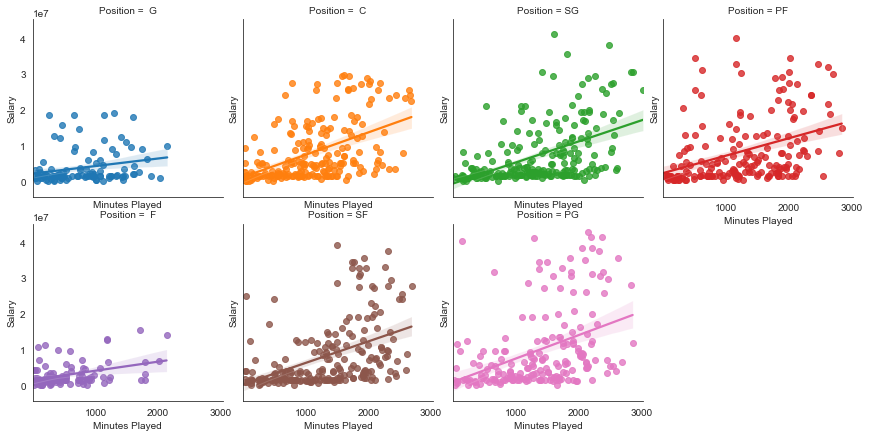

In [112]:
sns.lmplot(x="Minutes_Playes", y="Salary",hue="Position",col="Position",
           data=FinalData,height=3, aspect=1,col_wrap=4).set(xlabel='Minutes Played', ylabel='Salary')

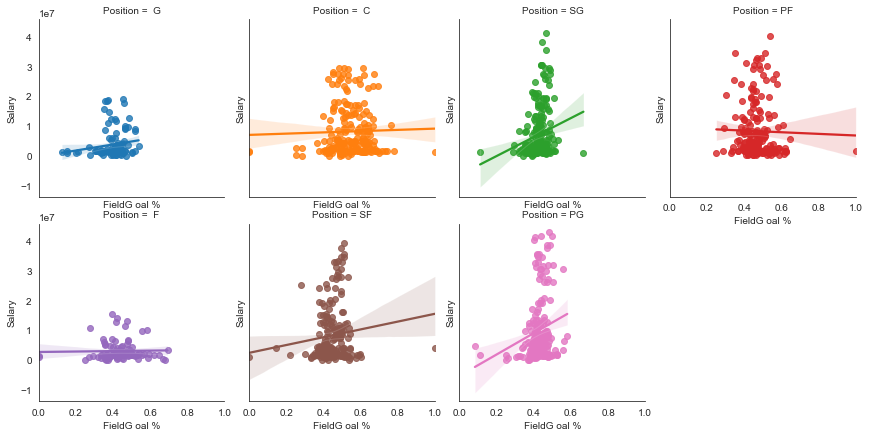

In [113]:
sns.lmplot(x="Field_Goal_%", y="Salary",hue="Position",col="Position",
           data=FinalData,height=3, aspect=1,col_wrap=4).set(xlabel='FieldG oal %', ylabel='Salary')

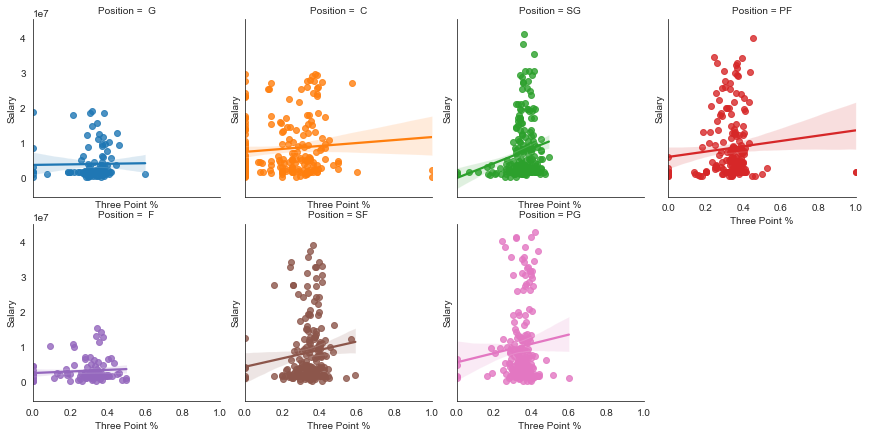

In [114]:
sns.lmplot(x="Three_Point_%", y="Salary",hue="Position",col="Position",
           data=FinalData,height=3, aspect=1,col_wrap=4).set(xlabel='Three Point %', ylabel='Salary')

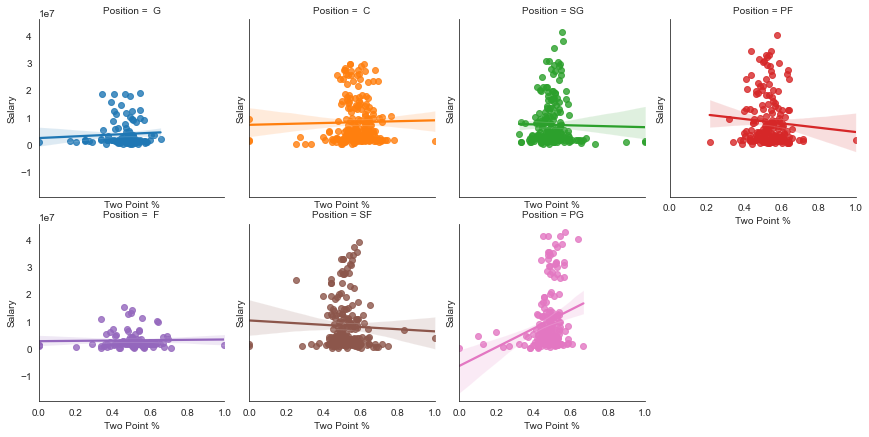

In [115]:
sns.lmplot(x="Two_Point_%", y="Salary",hue="Position",col="Position",
           data=FinalData,height=3, aspect=1,col_wrap=4).set(xlabel='Two Point %', ylabel='Salary')

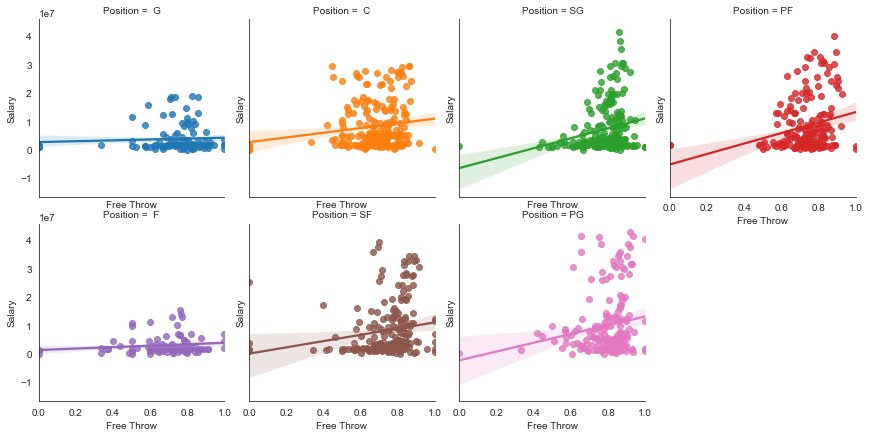

In [116]:
sns.lmplot(x="Free_Throw_%", y="Salary",hue="Position",col="Position",
           data=FinalData,height=3, aspect=1,col_wrap=4).set(xlabel='Free Throw', ylabel='Salary')

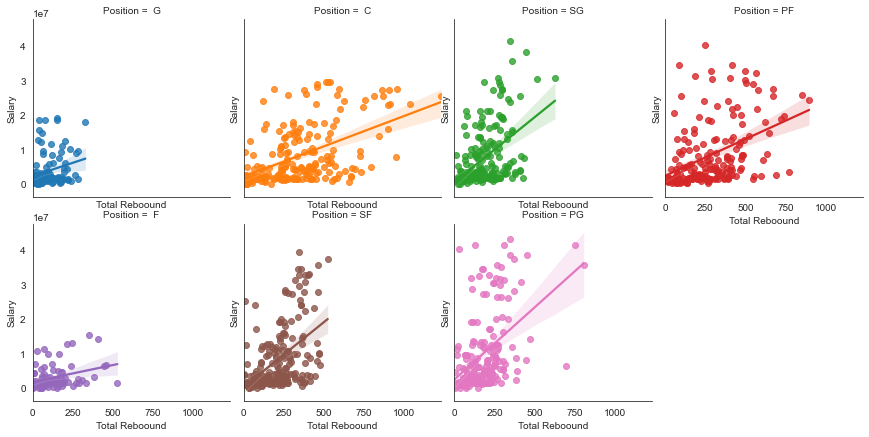

In [117]:
sns.lmplot(x="Total_Rebound", y="Salary",hue="Position",col="Position",
           data=FinalData,height=3, aspect=1,col_wrap=4).set(xlabel='Total Reboound', ylabel='Salary')

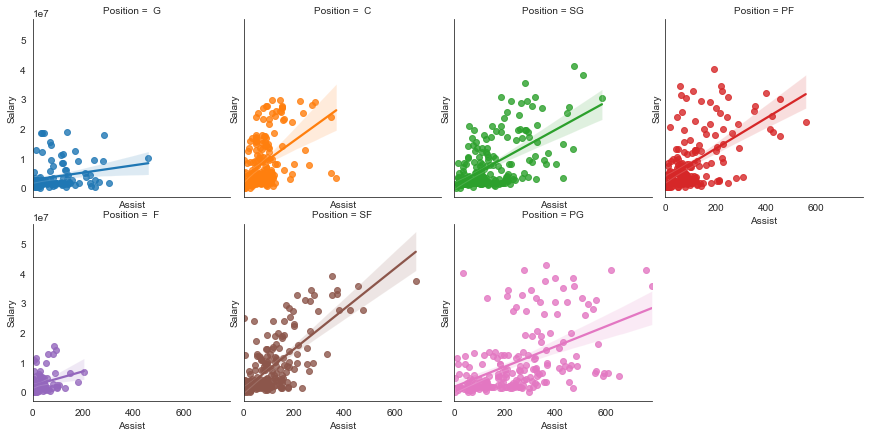

In [118]:
sns.lmplot(x="Assist", y="Salary",hue="Position",col="Position",
           data=FinalData,height=3, aspect=1,col_wrap=4).set(xlabel='Assist', ylabel='Salary')

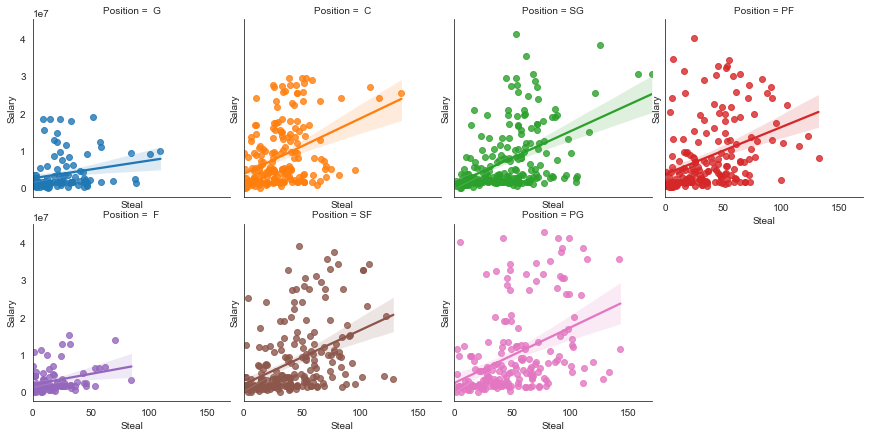

In [119]:
sns.lmplot(x="Steal", y="Salary",hue="Position",col="Position",
           data=FinalData,height=3, aspect=1,col_wrap=4).set(xlabel='Steal', ylabel='Salary')

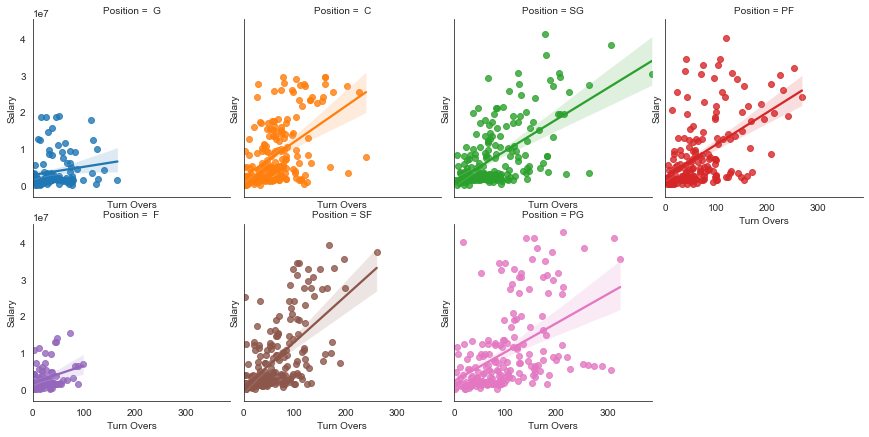

In [120]:
sns.lmplot(x="Turn_Over", y="Salary",hue="Position",col="Position",
           data=FinalData,height=3, aspect=1,col_wrap=4).set(xlabel='Turn Overs', ylabel='Salary')

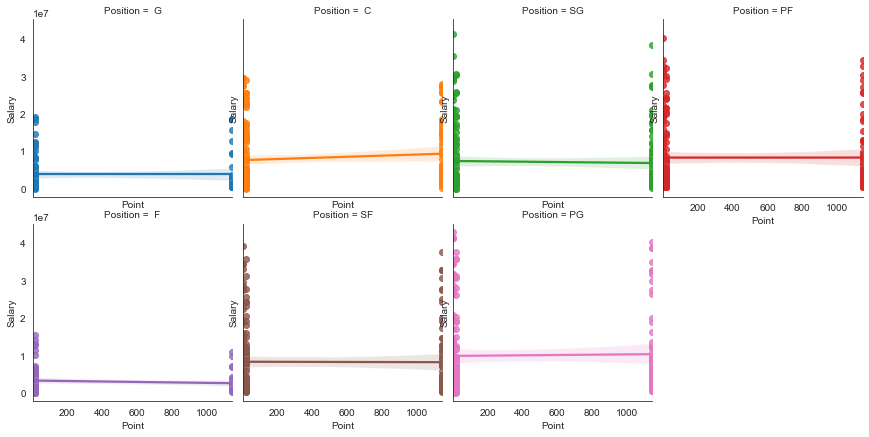

In [121]:
sns.lmplot(x="Points", y="Salary",hue="Position",col="Position",
           data=FinalData,height=3, aspect=1,col_wrap=4).set(xlabel='Point', ylabel='Salary')

## Isolating Position wise Data

In [129]:
FinalData = FinalData.drop(['Name','Team'],axis = 1)

In [130]:
#Point Guard
Data_PG = FinalData[FinalData['Position'] == 'PG']
Data_PG = Data_PG.drop(['Position'],axis = 1)

#Guard
Data_G = FinalData[FinalData['Position'] == ' G']
Data_G = Data_G.drop(['Position'],axis = 1)

# Power Forward
Data_PF = FinalData[FinalData['Position'] == 'PF']
Data_PF = Data_PF.drop(['Position'],axis = 1)

# Small Forward
Data_SF = FinalData[FinalData['Position'] == 'SF']
Data_SF = Data_SF.drop(['Position'],axis = 1)

# Forward
Data_F = FinalData[FinalData['Position'] == ' F']
Data_F = Data_F.drop(['Position'],axis = 1)

# Shooting Guard
Data_SG = FinalData[FinalData['Position'] == 'SG']
Data_SG = Data_SG.drop(['Position'],axis = 1)

# Center
Data_C = FinalData[FinalData['Position'] == ' C']
Data_C = Data_C.drop(['Position'],axis = 1)

# Predecting salary of Point Guard

In [131]:
import numpy as np
Groups = [Data_PG, Data_G, Data_PF, Data_SF, Data_F, Data_SG ,Data_C]
result1 = []
result2 = []
for i in Groups:
    X = i.iloc[:,:-1].values
    y = i.iloc[:,-1].values
    # Splitting Data in Test set and Train set
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train[:, :] = sc.fit_transform(X_train[:, :])
    X_test[:, :] = sc.transform(X_test[:, :])
    # Multiple Linear Regression
    from sklearn.linear_model import LinearRegression
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    # Predict the test set results
    y_pred = regressor.predict(X_test)
    np.set_printoptions(precision = 2)
    print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))
    # Evaluating performance of Multiple Linear Regression
    from sklearn.metrics import r2_score
    result1.append(r2_score(y_test, y_pred))

[[17135232.49 12553571.  ]
 [16940197.68 30521115.  ]
 [ 8817414.27  7500000.  ]
 [11577675.6   5348007.  ]
 [15901844.78  3831840.  ]
 [20947388.54  8719320.  ]
 [ 8255868.26  5307120.  ]
 [ 5207481.06  6000000.  ]
 [24414307.81 34996296.  ]
 [  699816.01  9600000.  ]
 [ 1533254.99  1795015.  ]
 [13855406.45  1544951.  ]
 [  383350.6   1517981.  ]
 [  663634.79  3640200.  ]
 [13874153.13  5572680.  ]
 [ 6900862.81 13535714.  ]
 [21995760.71 40231758.  ]
 [15503629.   20000000.  ]
 [ 7825418.27  1663861.  ]
 [20437065.63 30500000.  ]
 [13296701.09 14975000.  ]
 [ 3771477.42  1588231.  ]
 [ 3868287.07 11571429.  ]
 [  661144.05  3000000.  ]
 [16113378.51 34502130.  ]
 [12955944.29 11500000.  ]
 [ 6280995.18  1620564.  ]
 [ 8659703.92  1656092.  ]
 [ 8212765.24  3200000.  ]
 [11729626.81  4764960.  ]
 [ 3642548.78  4155720.  ]
 [ 2204308.89  5000000.  ]
 [19805938.49 11003782.  ]
 [ 1834560.86   988464.  ]
 [10632164.34 13333333.  ]
 [12740463.02  4991880.  ]
 [ 7767037.31 12000000.  ]
 

In [132]:
pd.DataFrame({
    "Group":['Data_PG', 'Data_G', 'Data_PF', 'Data_SF', 'Data_F', 'Data_SG' ,'Data_C'] ,
    "r2 Score": result1
})

,Group,r2 Score
0,Data_PG,0.450692
1,Data_G,-0.097661
2,Data_PF,0.522359
3,Data_SF,0.617135
4,Data_F,-0.315265
5,Data_SG,0.506242
6,Data_C,0.213775


## Predeciting result for SF PF and SG


In [133]:
# Small Forward
import numpy as np
i = Data_SF
X = i.iloc[:,:-1].values
y = i.iloc[:,-1].values
# Splitting Data in Test set and Train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, :] = sc.fit_transform(X_train[:, :])
X_test[:, :] = sc.transform(X_test[:, :])
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
# Predict the test set results
y_pred = regressor.predict(X_test)

def GetSF(gp,mp,fg,tp,twp,ft,tr,a,s,b,t,p):
    newX = np.array([[p,mp,fg,tp,twp,ft,tr,a,s,b,t,p]])
    newX = sc.transform(newX)
    y = regressor.predict(newX)
    print(y)


In [134]:
GetSF(43,1281,0.543,0.265,0.583,0.578,251.0,128.0,54.0,37.0,58.0,017.0)

[15199404.23]


In [135]:
# Power Forward
import numpy as np
i = Data_PF
X = i.iloc[:,:-1].values
y = i.iloc[:,-1].values
# Splitting Data in Test set and Train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, :] = sc.fit_transform(X_train[:, :])
X_test[:, :] = sc.transform(X_test[:, :])
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
# Predict the test set results
y_pred = regressor.predict(X_test)

def GetPF(gp,mp,fg,tp,twp,ft,tr,a,s,b,t,p):
    newX = np.array([[p,mp,fg,tp,twp,ft,tr,a,s,b,t,p]])
    newX = sc.transform(newX)
    y = regressor.predict(newX)
    print(y)

In [136]:
GetPF(43,1281,0.543,0.265,0.583,0.578,251.0,128.0,54.0,37.0,58.0,017.0)

[13886100.96]


In [137]:
# Shooting Guard
import numpy as np
i = Data_SF
X = i.iloc[:,:-1].values
y = i.iloc[:,-1].values
# Splitting Data in Test set and Train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, :] = sc.fit_transform(X_train[:, :])
X_test[:, :] = sc.transform(X_test[:, :])
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
# Predict the test set results
y_pred = regressor.predict(X_test)

def GetSG(gp,mp,fg,tp,twp,ft,tr,a,s,b,t,p):
    newX = np.array([[p,mp,fg,tp,twp,ft,tr,a,s,b,t,p]])
    newX = sc.transform(newX)
    y = regressor.predict(newX)
    print(y)

In [138]:
GetSG(43,1281,0.543,0.265,0.583,0.578,251.0,128.0,54.0,37.0,58.0,017.0)

[15199404.23]
